In [1]:
import numpy as np
import cv2
import scipy
import matplotlib.pyplot as plt
import math

In [2]:
def adjustGamma(image, gamma=1.0):
	# build a lookup table mapping the pixel values [0, 255] to
	# their adjusted gamma values
	invGamma = 1.0 / gamma
	table = np.array([((i / 255.0) ** invGamma) * 255
		for i in np.arange(0, 256)]).astype("uint8")
	# apply gamma correction using the lookup table
	return cv2.LUT(image, table)

In [16]:
def AdaptivehistogramEqualizer(image):
    # gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image_lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(image_lab)

    clahe = cv2.createCLAHE(clipLimit = 5)
    l_eq = clahe.apply(l)
    equalized_image = cv2.merge((np.uint8(l_eq), a, b))

    # equalized_image = np.zeros_like(image)
    equalized_image = cv2.cvtColor(equalized_image, cv2.COLOR_LAB2BGR)
    return equalized_image

In [3]:
def histogramEqualizer(image):
    # gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image_lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(image_lab)

    channel = l
    channel_flat = channel.flatten()
    histogram, _ = np.histogram(channel_flat, 256, [0, 256], True)
    cdf = histogram.cumsum()

    new_bin = (255 * cdf).astype(int)
    new_channel = new_bin[channel_flat]
    equalized_l = new_channel.reshape(l.shape)
    equalized_image = cv2.merge((np.uint8(equalized_l), a, b))

    # equalized_image = np.zeros_like(image)
    equalized_image = cv2.cvtColor(equalized_image, cv2.COLOR_LAB2BGR)
    return equalized_image


In [17]:
def main():  
    BasePath = '/home/sakshi/courses/ENPM673/sakshi_p2/'
    # SavePath = BasePath + "Results/problem1/"
    video_file = BasePath + "Data/Night Drive - 2689.mp4"

    cap = cv2.VideoCapture(video_file)
    k = 300
    i = 0
    c = None

    while(True):
        ret, frame = cap.read()
        if i == k:
            c = frame
        i= i + 1

        
        if not ret:
            print("Stream ended..")
            break
        # hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        # image = histogramEqualizer(hsv)
        # image = cv2.cvtColor(image, cv2.COLOR_HSV2RGB)
        image = adjustGamma(frame, 2)
        image_hist = histogramEqualizer(image)
        image_adaptive_hist = AdaptivehistogramEqualizer(image)
        cv2.imshow('frame',image_adaptive_hist)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

(1080, 1920) (1080, 1920)
(1080, 1920) (1080, 1920)
(1080, 1920) (1080, 1920)
(1080, 1920) (1080, 1920)
(1080, 1920) (1080, 1920)
(1080, 1920) (1080, 1920)
(1080, 1920) (1080, 1920)
(1080, 1920) (1080, 1920)
(1080, 1920) (1080, 1920)
(1080, 1920) (1080, 1920)
(1080, 1920) (1080, 1920)
(1080, 1920) (1080, 1920)
(1080, 1920) (1080, 1920)
(1080, 1920) (1080, 1920)
(1080, 1920) (1080, 1920)
(1080, 1920) (1080, 1920)
(1080, 1920) (1080, 1920)
(1080, 1920) (1080, 1920)
(1080, 1920) (1080, 1920)
(1080, 1920) (1080, 1920)
(1080, 1920) (1080, 1920)
(1080, 1920) (1080, 1920)
(1080, 1920) (1080, 1920)
(1080, 1920) (1080, 1920)
(1080, 1920) (1080, 1920)
(1080, 1920) (1080, 1920)
(1080, 1920) (1080, 1920)
(1080, 1920) (1080, 1920)
(1080, 1920) (1080, 1920)
(1080, 1920) (1080, 1920)
(1080, 1920) (1080, 1920)
(1080, 1920) (1080, 1920)
(1080, 1920) (1080, 1920)
(1080, 1920) (1080, 1920)
(1080, 1920) (1080, 1920)
(1080, 1920) (1080, 1920)
(1080, 1920) (1080, 1920)
(1080, 1920) (1080, 1920)
(1080, 1920)

In [ ]:
if __name__ == "__main__":
    main()

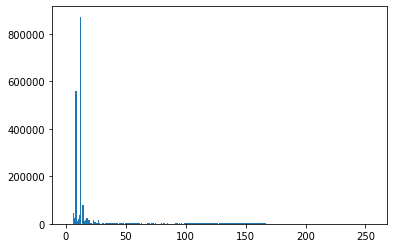

In [19]:
image_lab = cv2.cvtColor(o, cv2.COLOR_BGR2LAB)
l, a, b = cv2.split(image_lab)
channel = l
channel_flat = channel.flatten()
histogram, _ = np.histogram(channel_flat, 256, [0, 256], True)
plt.hist(channel_flat, bins=256)
plt.savefig("hist_adap.jpg")

In [18]:
o = AdaptivehistogramEqualizer(c)

In [11]:
cdf = histogram.cumsum()

new_bin = (255 * cdf).astype(int)
new_channel = new_bin[channel_flat]
equalized_l = new_channel.reshape(l.shape)

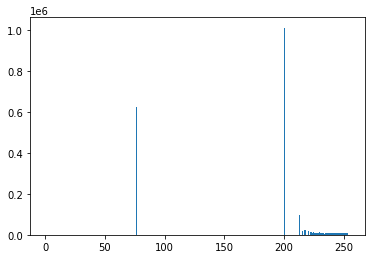

In [12]:
plt.hist(new_channel, bins=256)
plt.savefig("hist_eq.jpg")

In [203]:
frame = adjustGamma(image, 2)
cv2.imshow('frame', image)
cv2.waitKey()
cv2.destroyAllWindows()

In [204]:
lab_image = cv2.cvtColor(frame, cv2.COLOR_BGR2LAB)
l, a, b = cv2.split(lab_image)
cv2.imshow('frame', l)
cv2.waitKey()
cv2.destroyAllWindows()

Text(0.5, 1.0, 'equalized')

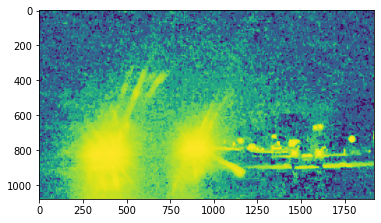

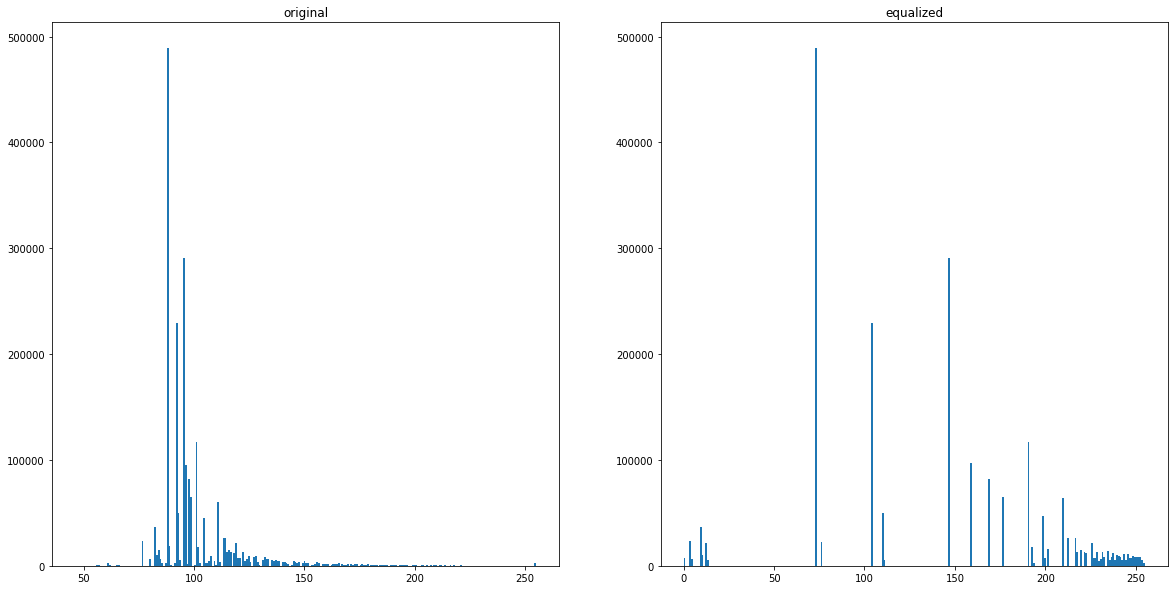

In [205]:
l_flat = l.flatten()
histogram, _ = np.histogram(l_flat, 256, [0, 256])
#clipping
clipping_ratio = 2
clipping_thresh = (np.max(histogram) / 2).astype(int)

##
cdf = histogram.cumsum()
new_bin = np.floor(255 * cdf/np.max(cdf)).astype(int)
new_l = new_bin[l_flat]
equalized_l = new_l.reshape(l.shape)
plt.imshow(equalized_l)

fx, plts = plt.subplots(1,2,figsize = (20,10))
plts[0].hist(l_flat, bins=256)
plts[0].set_title('original')
plts[1].hist(new_l, bins=256)
plts[1].set_title('equalized')


In [206]:
histogram_eq, _ = np.histogram(new_l, 256, [0, 256])
clipping_ratio = 100
clipping_thresh = (np.max(histogram_eq) / clipping_ratio).astype(int)
idx = np.where(histogram_eq > clipping_thresh)[0]
print("idx = ", idx)

histogram_clipped = histogram_eq.copy()
histogram_clipped[idx] = clipping_thresh
extra = np.sum(histogram_eq[idx] - histogram_clipped[idx])

idx_dist = np.where(histogram_clipped < clipping_thresh)[0]
distribution = math.floor(extra / idx_dist.shape[0])
left = extra - idx_dist.shape[0] * distribution 
histogram_clipped[idx_dist] = histogram_clipped[idx_dist]  +  distribution
histogram_clipped[idx_dist[0: left]] = histogram_clipped[idx_dist[0: left]]  +  1


idx =  [  0   3   4   9  10  12  13  73  76 104 110 111 147 159 169 177 191 193
 199 200 202 210 213 217 218 220 222 223 226 227 228 229 231 232 233 235
 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253
 254]


In [207]:
np.max(histogram_clipped)

13456

In [208]:
np.max(new_l)

255

Text(0.5, 1.0, 'clipped')

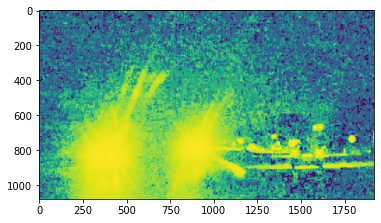

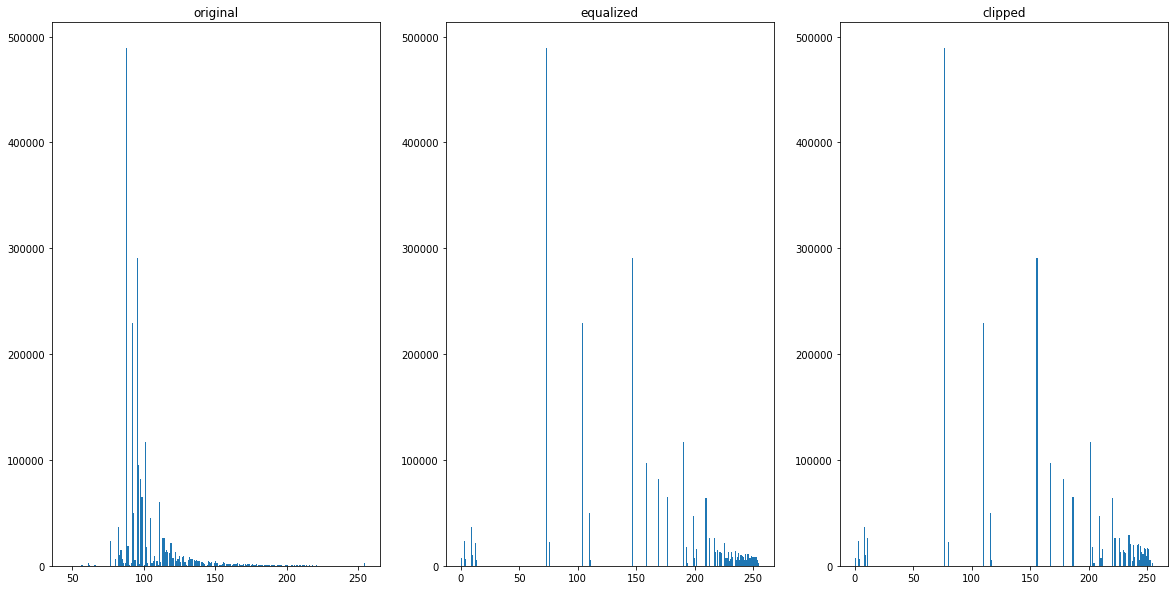

In [210]:
cdf_clipped = histogram_clipped.cumsum()
new_bin_clipped = np.floor(255 * cdf_clipped/np.max(cdf_clipped)).astype(int)
new_l_clipped = new_bin_clipped[new_l]
equalized_l = new_l_clipped.reshape(l.shape)
plt.imshow(equalized_l)

fx, plts = plt.subplots(1,3,figsize = (20,10))
plts[0].hist(l_flat, bins=256)
plts[0].set_title('original')
plts[1].hist(new_l, bins=256)
plts[1].set_title('equalized')
plts[2].hist(new_l_clipped, bins=256)
plts[2].set_title('clipped')
# plt.savefig(SavePath + "tagDetection"  + ".jpg")
# plt.hist(new_l, bins=256)

In [211]:
histogram_test, _ = np.histogram(new_l_clipped, 256, [0, 256])

In [213]:
np.sum(histogram_test)

2073600

In [91]:
extra

1339313

In [140]:
cv2.imshow('frame', equalized_l)
cv2.waitKey()
cv2.destroyAllWindows()

error: OpenCV(4.5.1) /tmp/pip-req-build-1syr35c1/opencv/modules/highgui/src/precomp.hpp:137: error: (-215:Assertion failed) src_depth != CV_16F && src_depth != CV_32S in function 'convertToShow'


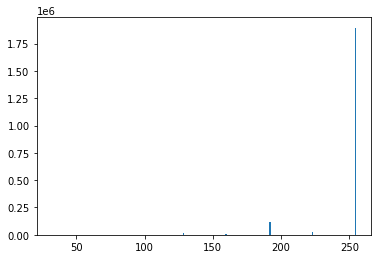

In [11]:
l_flat = l.flatten()
c = cv2.createCLAHE(clipLimit = 50, tileGridSize = (50,50))
# plt.hist(l_flat, bins=256)
l_eq = c.apply(l)
plt.hist(l_eq.flatten(), bins=256)
image_new = cv2.merge((l_eq, a, b))
image_new = cv2.cvtColor(image_new, cv2.COLOR_LAB2BGR)

In [22]:
cv2.imshow('frame', image_new)
cv2.waitKey()
cv2.destroyAllWindows()